# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 9)

#### Loading the data

In [2]:
# Load the data
# You can get more information on this dataset at 
# https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

df = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv')

In [3]:
# Review the column names
df.columns

Index(['Date', 'Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

In [4]:
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0
...,...,...,...,...
145809,10/30/2021 07:00:00 PM,83.0,24.0,59.0
145810,10/30/2021 08:00:00 PM,32.0,19.0,13.0
145811,10/30/2021 09:00:00 PM,41.0,13.0,28.0
145812,10/30/2021 10:00:00 PM,21.0,10.0,11.0


In [5]:
# Set the index of the time series
df.index = pd.DatetimeIndex(df.Date)

In [6]:
# Now drop the Date column as it is a part of the index
df.drop(columns='Date', inplace=True)

In [7]:
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [8]:
# Rename the columns to make them simpler to use
df.columns = ['Total', 'East', 'West']

### Data Exploration

In [9]:
df.shape

(145814, 3)

In [10]:
# Check the maximum and the minimum dates in our data
print(df.index.max())
print(df.index.min())

2021-10-30 23:00:00
2012-10-03 00:00:00


In [11]:
df.dropna(inplace=True)

In [12]:
# Let us look at some sample rows
df.head(10)

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


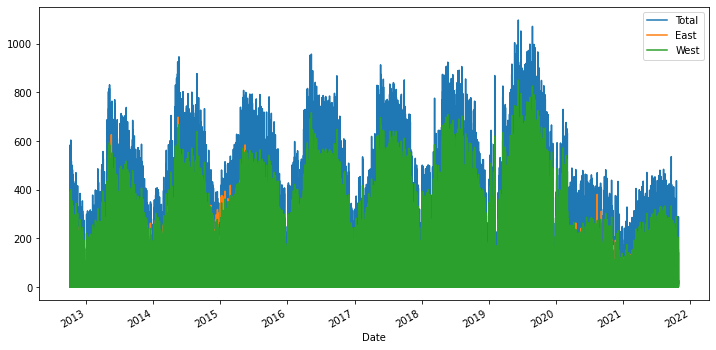

In [13]:
# We plot the data 
# Pandas knows that this is a time-series, and creates the right plot

df.plot(kind = 'line',figsize=(12,6));

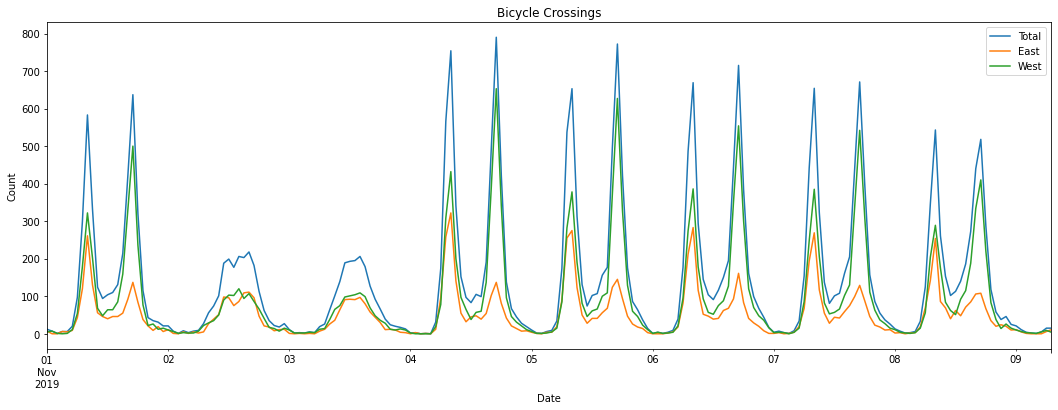

In [14]:
# Let us look at just the first 200 data points

title='Bicycle Crossings'
ylabel='Count'
xlabel='Date'


ax = df.iloc[:200,:].plot(figsize=(18,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## 1. Resampling

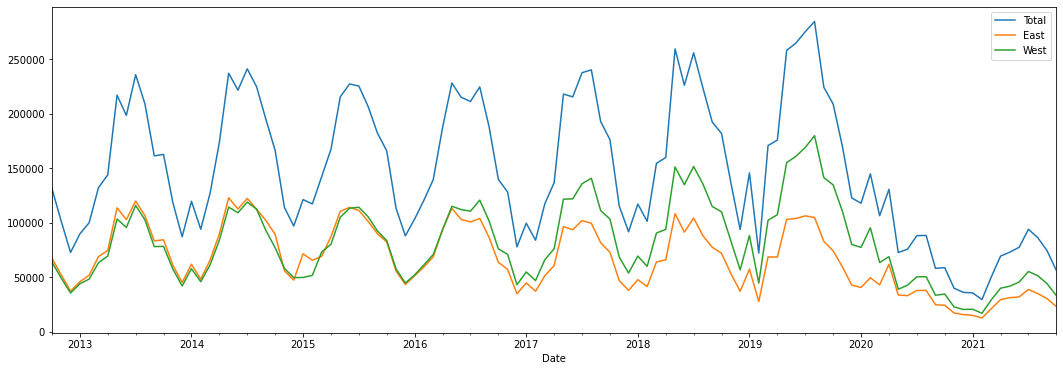

In [15]:
# Let us resample the data to be monthly

df.resample(rule='M').sum().plot(figsize = (18,6));

In [16]:
# Let us examine monthly data
# We create a new monthly dataframe

df_monthly = df.resample(rule='M').sum()

In [17]:
# Just to keep our analysis clean and be able to understand concepts,
# we will limit ourselves to pre-Covid data
df_precovid = df_monthly[df_monthly.index < pd.to_datetime('2019-12-31')]

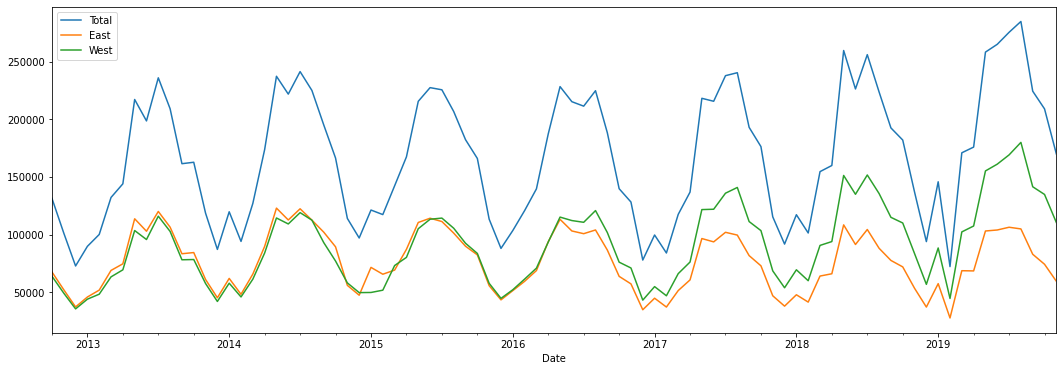

In [18]:
df_precovid.plot(figsize = (18,6));

In [19]:
# We suppress some warnings pandas produces, more for 
# visual cleanliness than any other reason

pd.options.mode.chained_assignment = None 

In [20]:
df_monthly

,Total,East,West
Date,,,
2012-10-31,131390.0,67528.0,63862.0
2012-11-30,101294.0,52124.0,49170.0
2012-12-31,72738.0,37216.0,35522.0
2013-01-31,89768.0,45820.0,43948.0
2013-02-28,100054.0,51796.0,48258.0
...,...,...,...
2021-06-30,77473.0,31895.0,45578.0
2021-07-31,93994.0,38743.0,55251.0
2021-08-31,86354.0,34955.0,51399.0


### Plot by month and quarter

In [21]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

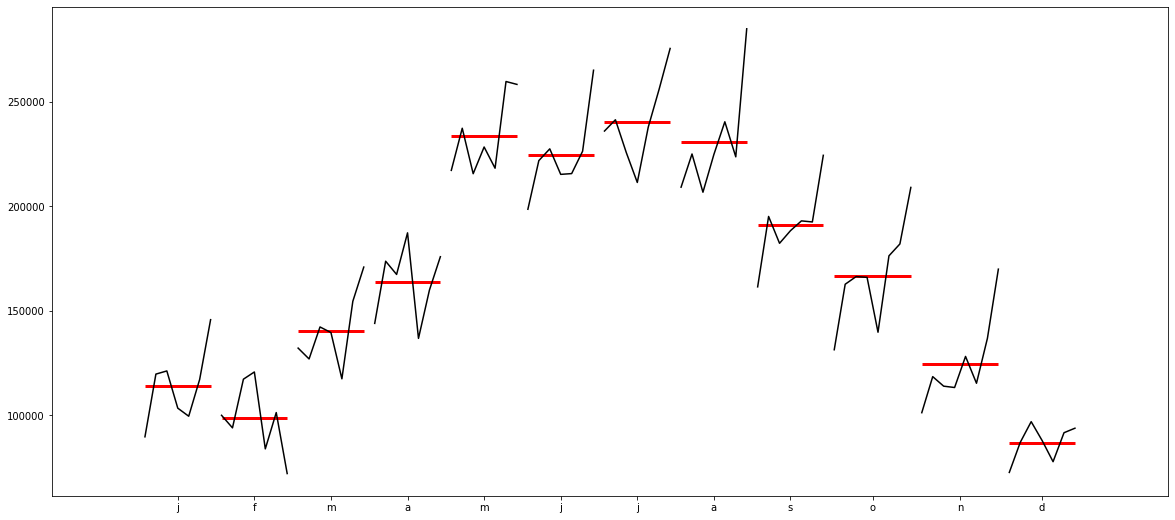

In [22]:
# Plot the months to see trends over months
month_plot(df_precovid.Total);

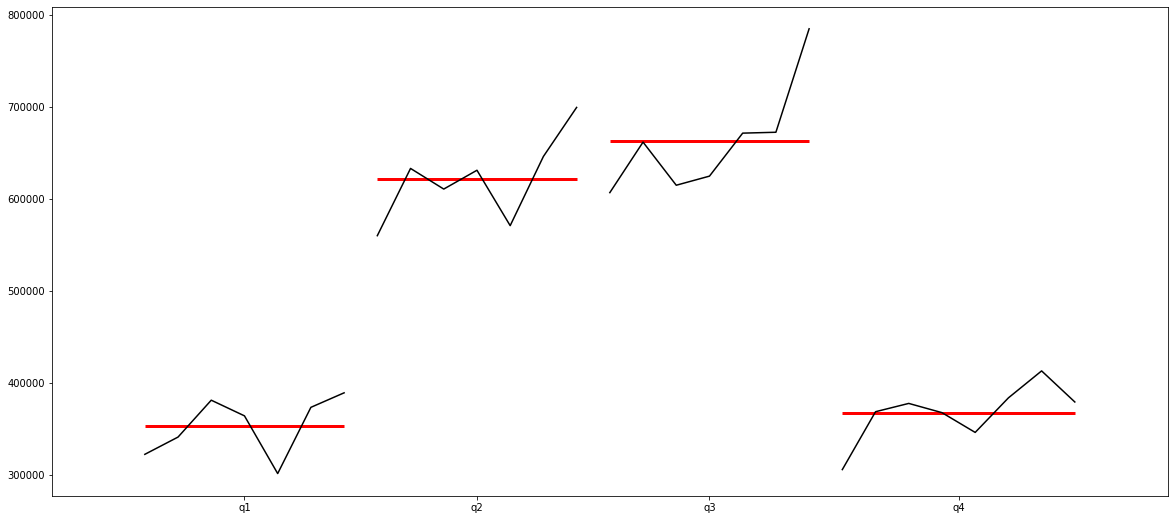

In [23]:
# Plot the quarter to see trends over quarters
quarter_plot(df_precovid.resample(rule='Q').Total.sum());

## 2. ETS Decomposition

##### Multiplicative

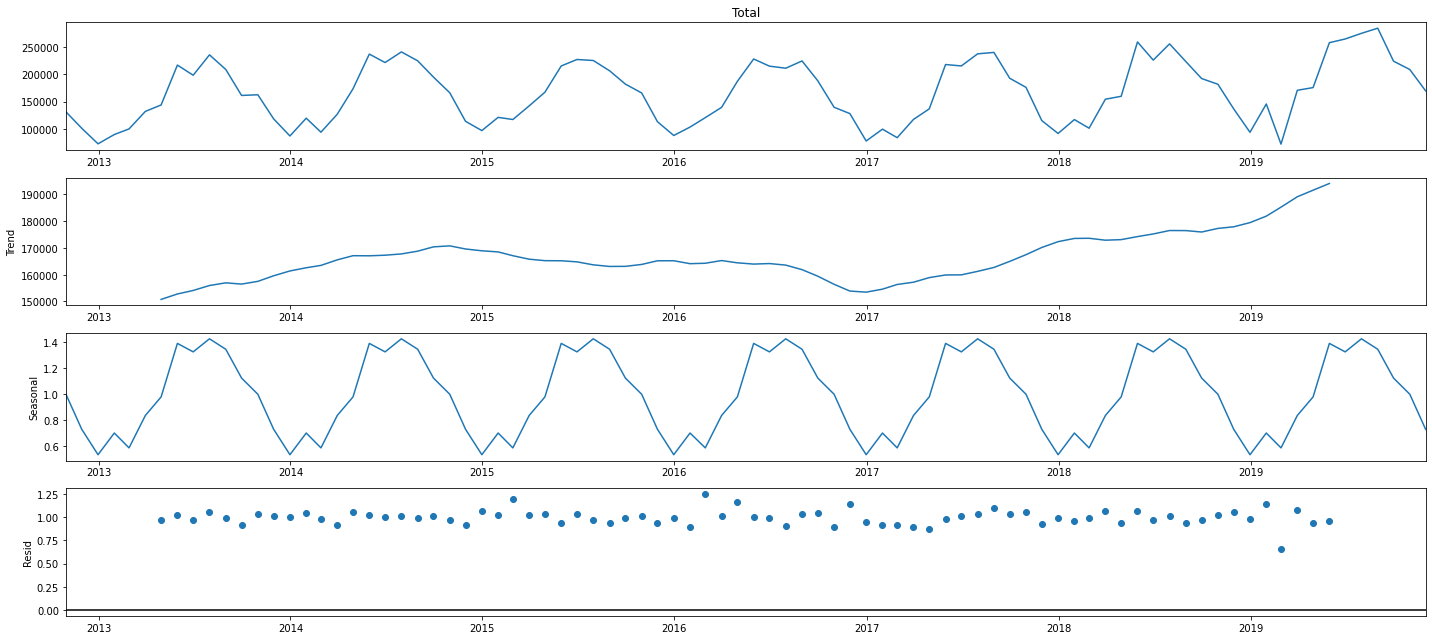

In [24]:
# Now we decompose our time series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_precovid['Total'], model = 'multiplicative') 
plt.rcParams['figure.figsize'] = (20, 9)
result.plot();

##### Additive

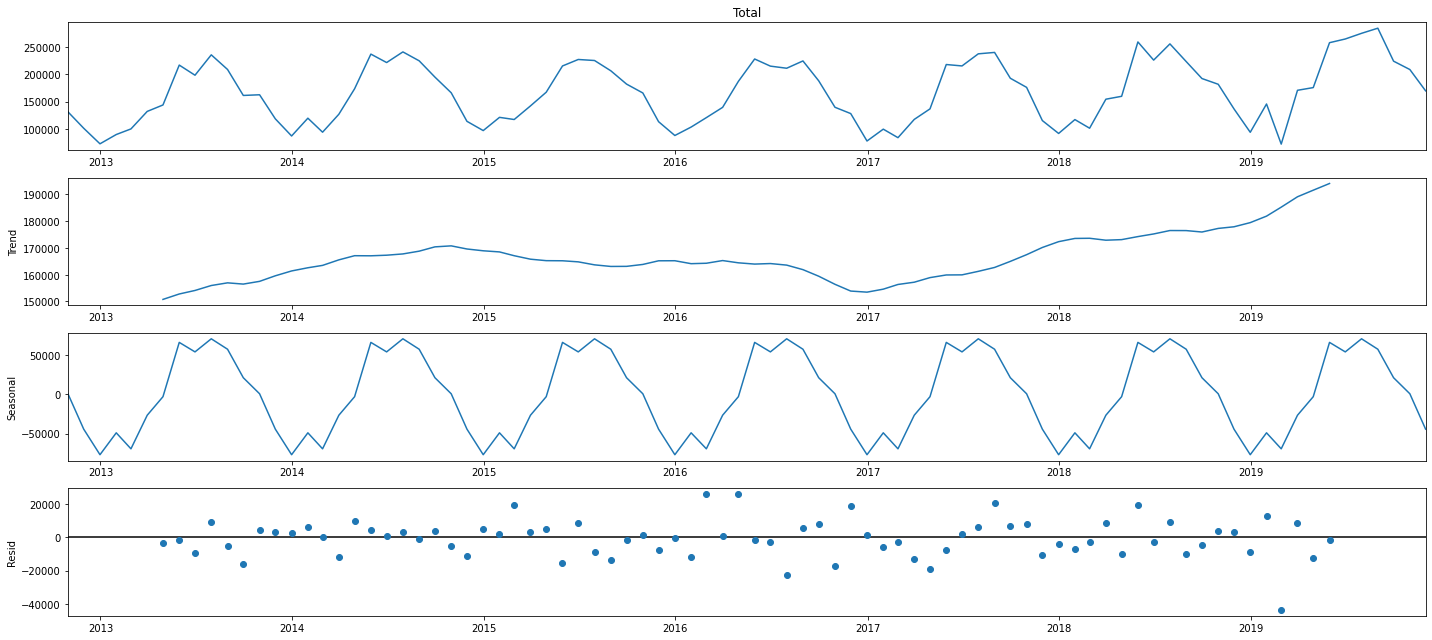

In [25]:
result = seasonal_decompose(df_precovid['Total'], model = 'additive') 
plt.rcParams['figure.figsize'] = (20, 9)
result.plot();

In [26]:
# Each of the above components are contained in our `result`
# object as trend, seasonal and error.
# Let us put them in a dataframe
pd.DataFrame({'Total': df_precovid['Total'], 
              'trend': result.trend, 
              'seasonality': result.seasonal, 
              'error': result.resid}).head(20)

,Total,trend,seasonality,error
Date,,,,
2012-10-31,131390.0,NaN,631.841270,NaN
2012-11-30,101294.0,NaN,-44343.867063,NaN
2012-12-31,72738.0,NaN,-76873.492063,NaN
2013-01-31,89768.0,NaN,-49034.880952,NaN
2013-02-28,100054.0,NaN,-69392.617063,NaN
2013-03-31,132178.0,NaN,-26659.255952,NaN
2013-04-30,143996.0,150773.916667,-3072.448413,-3705.468254
2013-05-31,217148.0,152797.250000,65970.230159,-1619.480159
2013-06-30,198560.0,154114.500000,53902.174603,-9456.674603


## 3. Moving Average and Exponentially Weighted Moving Average
Rolling averages and EWMA tend to smooth out noise as well as seasonality.  
They are a simple tool for exploring underlying trends.

In [27]:
# let us look at rolling averages & EWM together

new_df = df_precovid[['Total']]
new_df['Moving_Avg_6m'] = new_df['Total'].rolling(window=6).mean()
new_df['Moving_Avg_12m'] = new_df['Total'].rolling(window=12).mean()

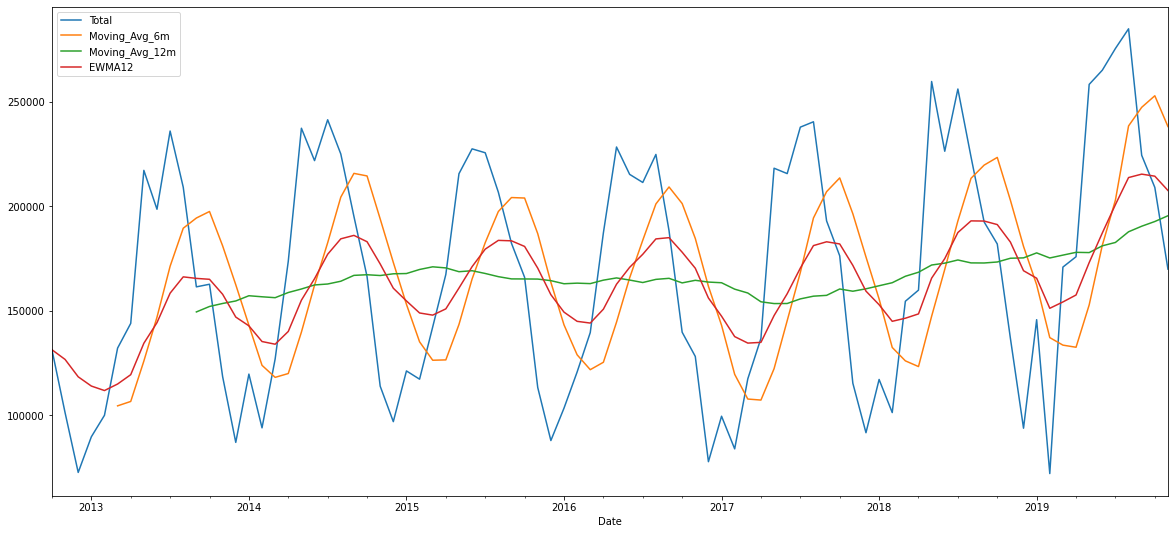

In [28]:
new_df['EWMA12'] = new_df['Total'].ewm(span=12,adjust=False).mean() 

# Note that available EW functions include mean(), var(), std(), corr(), cov().

new_df.plot();

In [29]:
2/(12+1) 

0.15384615384615385

***
## 4. Stationarity

In [30]:
# Let us get some data.  We download the daily time series for the S&P500 for 30 months
import yfinance as yf
SPY = yf.download('SPY', start = '2013-01-01', end = '2015-06-30')

[*********************100%***********************]  1 of 1 completed


In [31]:
# Clean up
SPY.index = pd.DatetimeIndex(SPY.index) # Set index
SPY = SPY.asfreq('B') # This creates rows for any missing dates
SPY.fillna(method = 'bfill', inplace=True) # Fills missing dates with last observation

In [32]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 2013-01-02 to 2015-06-29
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       649 non-null    float64
 1   High       649 non-null    float64
 2   Low        649 non-null    float64
 3   Close      649 non-null    float64
 4   Adj Close  649 non-null    float64
 5   Volume     649 non-null    float64
dtypes: float64(6)
memory usage: 35.5 KB


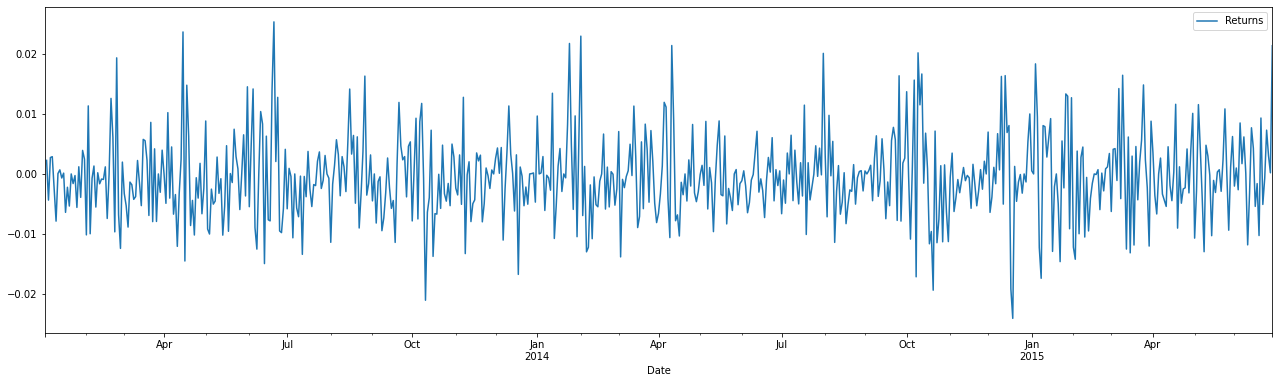

In [33]:
SPY['Returns'] = (SPY['Close'].shift(1) / SPY['Close']) - 1
SPY[['Returns']].plot(figsize = (22,6));


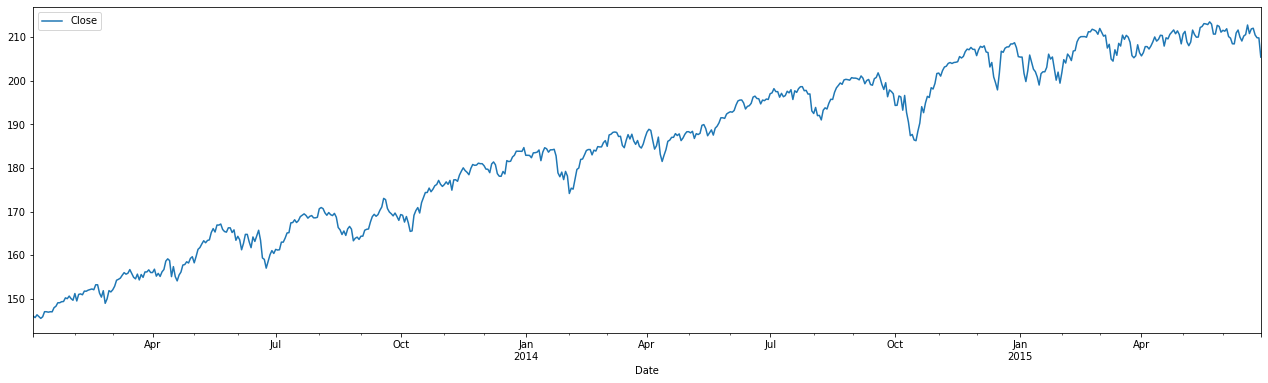

In [34]:
SPY[['Close']].plot(figsize = (22,6));

#### Dickey Fuller Test for Stationarity

In [35]:
from statsmodels.tsa.stattools import adfuller
adfuller(SPY['Close'])

(-1.6928673813673647,
 0.43479111287845346,
 0,
 648,
 {'1%': -3.4404817800778034,
  '5%': -2.866010569916275,
  '10%': -2.569150763698369},
 2126.1002309138994)

In [36]:
adfuller(SPY['Returns'].dropna())

(-26.546757517762988,
 0.0,
 0,
 647,
 {'1%': -3.4404975024933813,
  '5%': -2.8660174956716795,
  '10%': -2.569154453750397},
 -4424.286299515888)

***
## 5. Auto-Correlation and Partial Auto-Correlation (ACF and PACF plots)

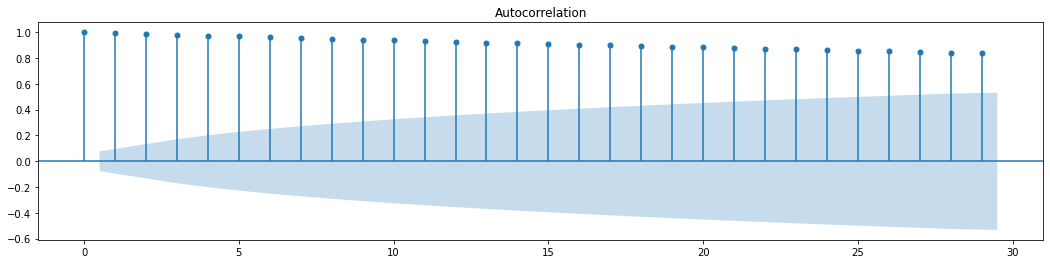

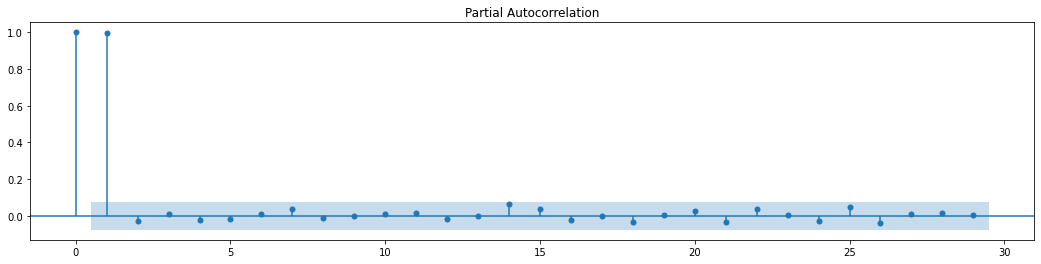

In [37]:
plt.rc("figure", figsize=(18,4))
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(SPY['Close']);
plot_pacf(SPY['Close']);

/opt/conda/envs/mggy8413/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


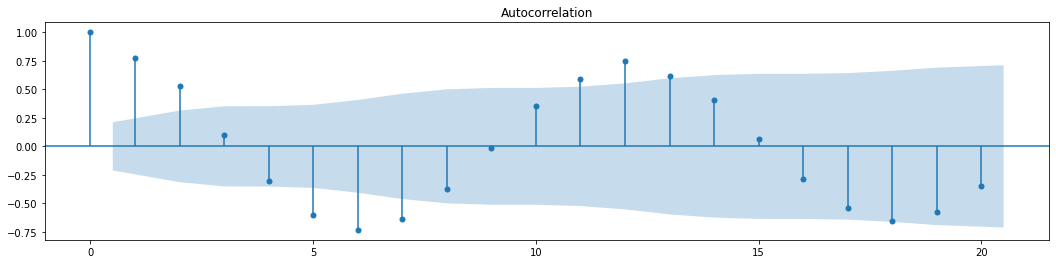

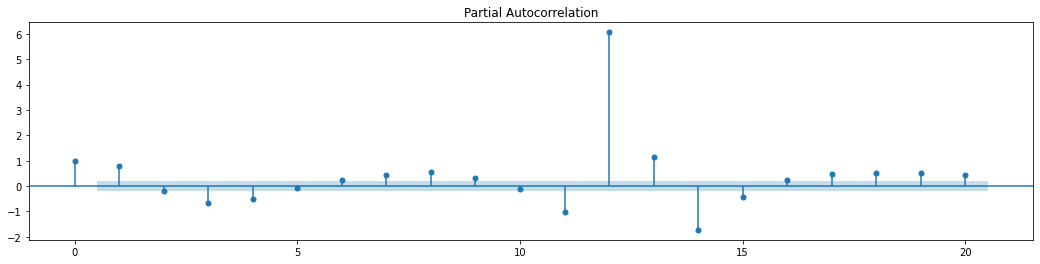

In [38]:
plot_acf(new_df.Total);
plot_pacf(new_df.Total);

***
## 6. Granger Causality Tests

In [39]:
from statsmodels.tsa.stattools import grangercausalitytests

In [40]:
# Data adapted from: 
# https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries
df_elec = pd.read_csv('pwr_usage.csv')
df_elec.index = pd.DatetimeIndex(df_elec.Date, freq='W-SUN')
df_elec.drop(['Date'], axis = 1, inplace = True)
df_elec

,Temp_avg,kwh
Date,,
2017-01-08,75.542857,106.549
2017-01-15,71.014286,129.096
2017-01-22,64.414286,68.770
2017-01-29,56.728571,71.378
2017-02-05,66.128571,107.829
...,...,...
2019-12-08,74.371429,167.481
2019-12-15,61.242857,86.248
2019-12-22,50.000000,73.206


In [41]:
# Check if Average Temperature can be used to predict kwh

grangercausalitytests(df_elec[["kwh", "Temp_avg"]], maxlag = 6);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1022  , p=0.7496  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.1042  , p=0.7468  , df=1
likelihood ratio test: chi2=0.1042  , p=0.7469  , df=1
parameter F test:         F=0.1022  , p=0.7496  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9543  , p=0.3874  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=1.9722  , p=0.3730  , df=2
likelihood ratio test: chi2=1.9597  , p=0.3754  , df=2
parameter F test:         F=0.9543  , p=0.3874  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6013  , p=0.1916  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=5.0327  , p=0.1694  , df=3
likelihood ratio test: chi2=4.9523  , p=0.1753  , df=3
parameter F test:         F=1.6013  , p=0.1916  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5901  , p=0.1801  

In [42]:
# Check if kwh can be used to predict Average Temperature 
# While we get p<0.05 at lag 3, the result is obviously absurd
grangercausalitytests(df_elec[["Temp_avg", "kwh"]], maxlag = 6);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1953  , p=0.0758  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=3.2580  , p=0.0711  , df=1
likelihood ratio test: chi2=3.2244  , p=0.0725  , df=1
parameter F test:         F=3.1953  , p=0.0758  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8694  , p=0.0599  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=5.9301  , p=0.0516  , df=2
likelihood ratio test: chi2=5.8194  , p=0.0545  , df=2
parameter F test:         F=2.8694  , p=0.0599  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0044  , p=0.0324  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=9.4423  , p=0.0240  , df=3
likelihood ratio test: chi2=9.1642  , p=0.0272  , df=3
parameter F test:         F=3.0044  , p=0.0324  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3019  , p=0.2722  

***
## 7. Holt-Winters Method
### Simple, Double and Triple Exponential Smoothing

In [43]:
new_df.index

DatetimeIndex(['2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',
               '2013-02-28', '2013-03-31', '2013-04-30', '2013-05-31',
               '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30',
               '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
               '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30',
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
      

In [44]:
# Clean up the data frame, set index frequency explicitly to Monthly
# This is needed as Holt-Winters will not work otherwise
new_df.index.freq = 'M'

In [45]:
new_df.dropna(inplace=True)

In [46]:
new_df

,Total,Moving_Avg_6m,Moving_Avg_12m,EWMA12
Date,,,,
2013-09-30,161458.0,194368.000000,149469.166667,165500.897182
2013-10-31,162704.0,197486.000000,152078.666667,165070.605308
2013-11-30,118540.0,181051.333333,153515.833333,157912.050645
2013-12-31,87106.0,162475.666667,154713.166667,147018.812084
2014-01-31,119746.0,143108.666667,157211.333333,142822.994840
...,...,...,...,...
2019-07-31,275428.0,202945.666667,182687.500000,200778.041464
2019-08-31,284828.0,238384.000000,187788.333333,213708.804316
2019-09-30,224348.0,247289.666667,190443.666667,215345.603652


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse

#### Simple Exponential Smoothing (same as EWMA)

In [49]:
# Create the model
model = SimpleExpSmoothing(new_df['Total']).fit()

In [50]:
# Fit values
pd.DataFrame({'fitted':model.fittedvalues.shift(-1), 'actual':new_df['Total']})

,fitted,actual
Date,,
2013-09-30,161458.000000,161458.0
2013-10-31,162697.770000,162704.0
2013-11-30,118760.788850,118540.0
2013-12-31,87264.273944,87106.0
2014-01-31,119583.591370,119746.0
...,...,...
2019-07-31,275375.800249,275428.0
2019-08-31,284780.739001,284828.0
2019-09-30,224650.163695,224348.0


In [51]:
# Examine model parameters
model.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 161458.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
# RMSE calculation
x = pd.DataFrame({'fitted':model.fittedvalues.shift(-1), 'actual':new_df['Total']}).dropna()
rmse = np.sqrt(mse(x.fitted, x.actual))
rmse

188.1861001206949

#### Double Exponential Smoothing

In [53]:
model = ExponentialSmoothing(new_df['Total'], trend='mul').fit()

In [54]:
# Fit values
pd.DataFrame({'fitted':model.fittedvalues.shift(-1), 'actual':new_df['Total']})

,fitted,actual
Date,,
2013-09-30,162710.154096,161458.0
2013-10-31,163959.521060,162704.0
2013-11-30,119680.253842,118540.0
2013-12-31,87937.467751,87106.0
2014-01-31,120507.490679,119746.0
...,...,...
2019-07-31,277582.564932,275428.0
2019-08-31,287063.674925,284828.0
2019-09-30,226448.874304,224348.0


In [55]:
# Examine model parameters
model.params

{'smoothing_level': 0.995,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 161458.0,
 'initial_trend': 1.0077171772225595,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
# RMSE calculation
x = pd.DataFrame({'fitted':model.fittedvalues.shift(-1), 'actual':new_df['Total']}).dropna()
rmse = np.sqrt(mse(x.fitted, x.actual))
rmse

1397.6959742738645

#### Triple Exponential Smoothing

In [57]:
model = ExponentialSmoothing(new_df['Total'],trend='add',seasonal='add',seasonal_periods=12).fit()

In [58]:
# Fit values
pd.DataFrame({'fitted':model.fittedvalues, 'actual':new_df['Total']}) # shift(-1) not required for Triple Exp Smoothing

,fitted,actual
Date,,
2013-09-30,161640.375000,161458.0
2013-10-31,163022.695708,162704.0
2013-11-30,118960.587389,118540.0
2013-12-31,87602.740802,87106.0
2014-01-31,120299.652935,119746.0
...,...,...
2019-07-31,261837.312792,275428.0
2019-08-31,251758.472569,284828.0
2019-09-30,220494.475605,224348.0


In [59]:
# Examine model parameters
model.params

{'smoothing_level': 0.2525,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.29900000000000004,
 'damping_trend': nan,
 'initial_level': 190999.42857142858,
 'initial_trend': 182.37499999999991,
 'initial_seasons': array([ -29541.42857143,  -28295.42857143,  -72459.42857143,
        -103893.42857143,  -71253.42857143,  -96949.42857143,
         -64011.42857143,  -17289.42857143,   46288.57142857,
          30814.57142857,   50338.57142857,   33980.57142857]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
# RMSE calculation
x = pd.DataFrame({'fitted':model.fittedvalues, 'actual':new_df['Total']}).dropna()
rmse = np.sqrt(mse(x.fitted, x.actual))
rmse

15520.161652787108

In [61]:
new_df

,Total,Moving_Avg_6m,Moving_Avg_12m,EWMA12
Date,,,,
2013-09-30,161458.0,194368.000000,149469.166667,165500.897182
2013-10-31,162704.0,197486.000000,152078.666667,165070.605308
2013-11-30,118540.0,181051.333333,153515.833333,157912.050645
2013-12-31,87106.0,162475.666667,154713.166667,147018.812084
2014-01-31,119746.0,143108.666667,157211.333333,142822.994840
...,...,...,...,...
2019-07-31,275428.0,202945.666667,182687.500000,200778.041464
2019-08-31,284828.0,238384.000000,187788.333333,213708.804316
2019-09-30,224348.0,247289.666667,190443.666667,215345.603652


In [62]:
x

,fitted,actual
Date,,
2013-09-30,161640.375000,161458.0
2013-10-31,163022.695708,162704.0
2013-11-30,118960.587389,118540.0
2013-12-31,87602.740802,87106.0
2014-01-31,120299.652935,119746.0
...,...,...
2019-07-31,261837.312792,275428.0
2019-08-31,251758.472569,284828.0
2019-09-30,220494.475605,224348.0


In [63]:
model.forecast(10)

2019-12-31    126468.555701
2020-01-31    160149.379883
2020-02-29    128923.687783
2020-03-31    187390.827729
2020-04-30    204180.555405
2020-05-31    281806.143931
2020-06-30    271968.115649
2020-07-31    285587.327648
2020-08-31    277902.415538
2020-09-30    229553.346391
Freq: M, dtype: float64

### All three together

In [64]:
span = 12
alpha = 2/(span+1)

new_df['Simple_12m'] = SimpleExpSmoothing(new_df['Total']).fit().fittedvalues.shift(-1)
new_df['Double_12m'] = ExponentialSmoothing(new_df['Total'], trend='mul').fit().fittedvalues.shift(-1)
new_df['Triple_12m'] = ExponentialSmoothing(new_df['Total'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

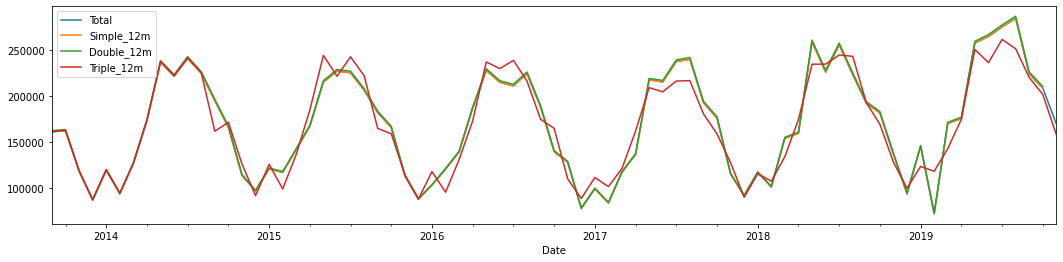

In [65]:
new_df[['Total', 'Simple_12m', 'Double_12m', 'Triple_12m']].plot();

In [66]:
#RMSE calculations
new_df.dropna(inplace=True)
print('Simple Exp Smoothing RMSE = ', mse(new_df.Total, new_df.Simple_12m, squared = False))
print('Double Exp Smoothing RMSE = ', mse(new_df.Total, new_df.Double_12m, squared = False))
print('Triple Exp Smoothing RMSE = ', mse(new_df.Total, new_df.Triple_12m, squared = False))

Simple Exp Smoothing RMSE =  188.1861001206949
Double Exp Smoothing RMSE =  1397.6959742738645
Triple Exp Smoothing RMSE =  15565.333524244134


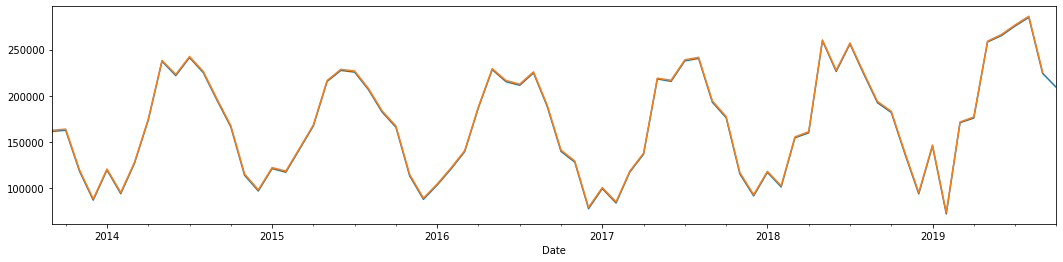

,Total,Moving_Avg_6m,Moving_Avg_12m,EWMA12,Simple_12m,Double_12m,Triple_12m
Date,,,,,,,
2013-09-30,161458.0,194368.000000,149469.166667,165500.897182,161458.000000,162710.154096,161640.375000
2013-10-31,162704.0,197486.000000,152078.666667,165070.605308,162697.770000,163959.521060,163022.695708
2013-11-30,118540.0,181051.333333,153515.833333,157912.050645,118760.788850,119680.253842,118960.587389
2013-12-31,87106.0,162475.666667,154713.166667,147018.812084,87264.273944,87937.467751,87602.740802
2014-01-31,119746.0,143108.666667,157211.333333,142822.994840,119583.591370,120507.490679,120299.652935
...,...,...,...,...,...,...,...
2019-06-30,265024.0,181335.333333,181071.500000,187205.321731,264988.049770,267110.839889,236617.005215
2019-07-31,275428.0,202945.666667,182687.500000,200778.041464,275375.800249,277582.564932,261837.312792
2019-08-31,284828.0,238384.000000,187788.333333,213708.804316,284780.739001,287063.674925,251758.472569


In [67]:
new_df.Total.plot()
ExponentialSmoothing(new_df['Total'],trend='add').fit().fittedvalues.shift(-1).plot()
plt.show()
new_df

***
### Forecasting using Holt Winters

In [68]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse

In [69]:
# Train-test split
train_samples = int(new_df.shape[0] * 0.8)

train_set = new_df.iloc[:train_samples]
test_set = new_df.iloc[train_samples:]

print("Training set: ", train_set.shape[0])
print("Test set: ", test_set.shape[0])

Training set:  59
Test set:  15


In [70]:
# Fit model using Simple Exponential Smoothing
# model = SimpleExpSmoothing(train_set['Total']).fit()

In [71]:
# Double Exponential Smoothing
# model = ExponentialSmoothing(new_df['Total'], trend='mul').fit()

In [72]:
# Let us use the triple exponential smoothing model
model = ExponentialSmoothing(train_set['Total'],trend='add', \
                             seasonal='add',seasonal_periods=12).fit()

In [73]:
predictions = model.forecast(15)

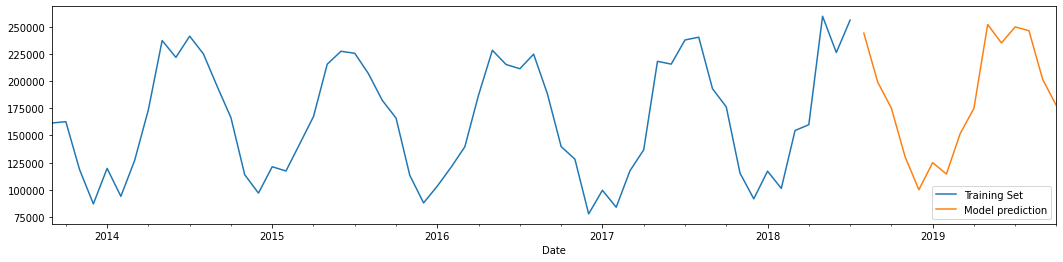

In [74]:
# let us plot the predictions and the training values
train_set['Total'].plot(legend=True,label='Training Set')
predictions.plot(legend=True,label='Model prediction');

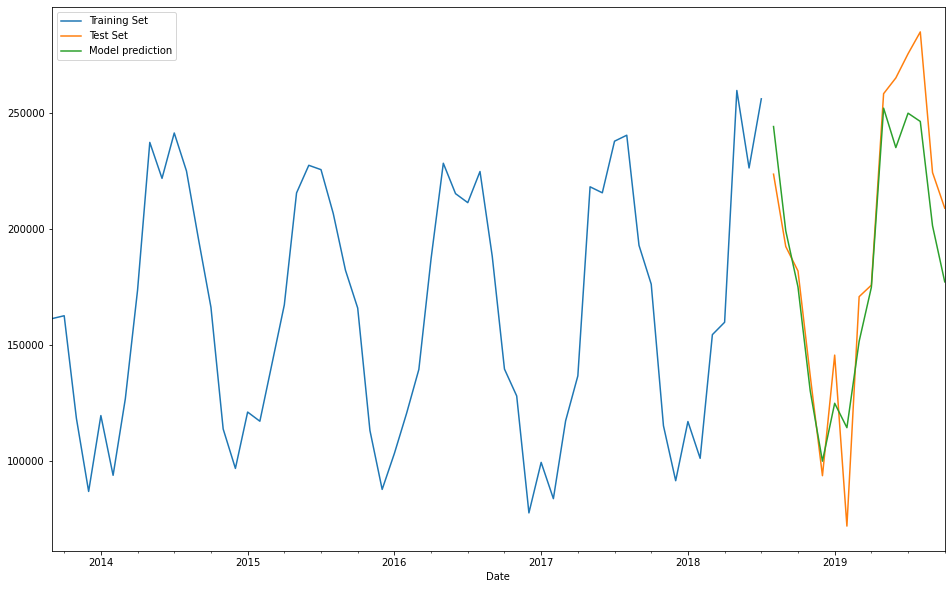

In [75]:
# Now we plot test (observed) values as well
train_set['Total'].plot(legend=True,label='Training Set')
test_set['Total'].plot(legend=True,label='Test Set',figsize=(16,10))
predictions.plot(legend=True,label='Model prediction');

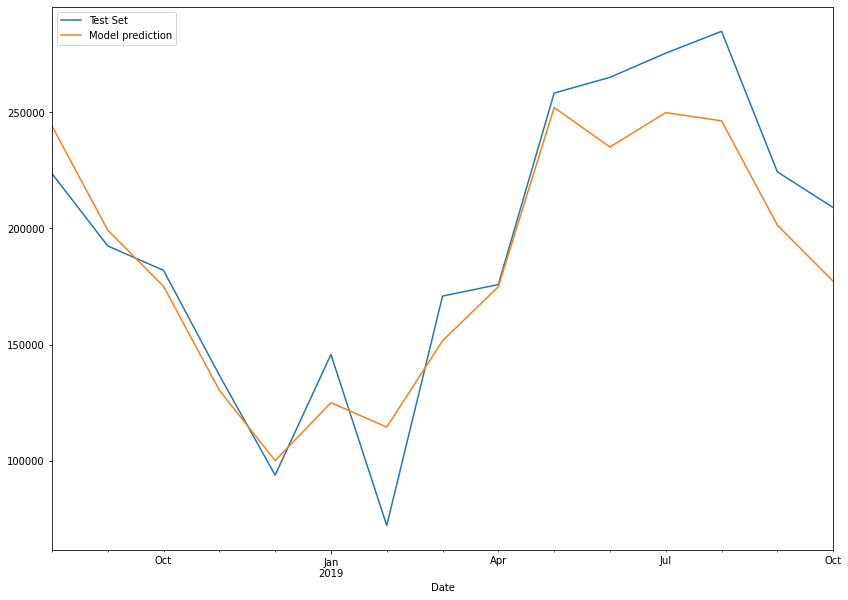

In [76]:
# Now we plot test (observed) values as well
# train_set['Total'].plot(legend=True,label='Training Set')
test_set['Total'].plot(legend=True,label='Test Set',figsize=(14,10))
predictions.plot(legend=True,label='Model prediction');

In [77]:
model.params

{'smoothing_level': 0.2525,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.3289,
 'damping_trend': nan,
 'initial_level': 184032.8,
 'initial_trend': 182.37499999999991,
 'initial_seasons': array([-22574.8, -21328.8, -65492.8, -96926.8, -64286.8, -89982.8,
        -57044.8, -10322.8,  53255.2,  37781.2,  57305.2,  40947.2]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
# Calculate Evaluation Metrics
y_test = test_set['Total']
y_pred = predictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2018-08-31,223618.0,244108.863026,-20490.863026
2018-09-30,192484.0,199253.674115,-6769.674115
2018-10-31,181964.0,175086.449780,6877.550220
2018-11-30,136862.0,130381.159967,6480.840033
2018-12-31,93882.0,100129.954457,-6247.954457
2019-01-31,145766.0,125042.138107,20723.861893
2019-02-28,72198.0,114543.475406,-42345.475406
2019-03-31,170914.0,151690.664232,19223.335768
2019-04-30,175864.0,174947.128480,916.871520
2019-05-31,258246.0,252017.570982,6228.429018


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  519514991.3950511
RMSE =  22792.871503938488
MAE =  18999.50578722273


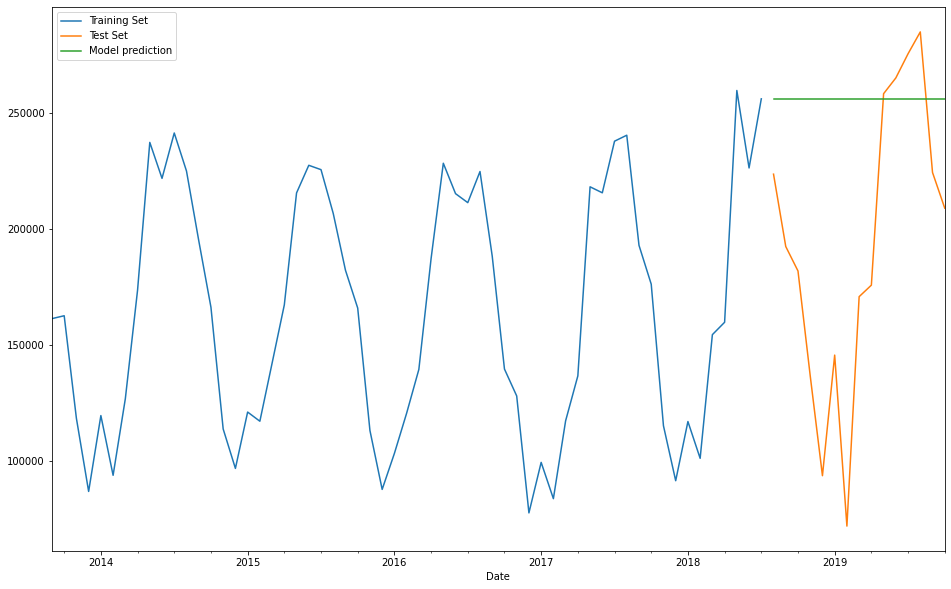

In [80]:
# Let us use the single exponential smoothing model
model = SimpleExpSmoothing(train_set['Total']).fit()
predictions = model.forecast(15)
train_set['Total'].plot(legend=True,label='Training Set')
test_set['Total'].plot(legend=True,label='Test Set',figsize=(16,10))
predictions.plot(legend=True,label='Model prediction');

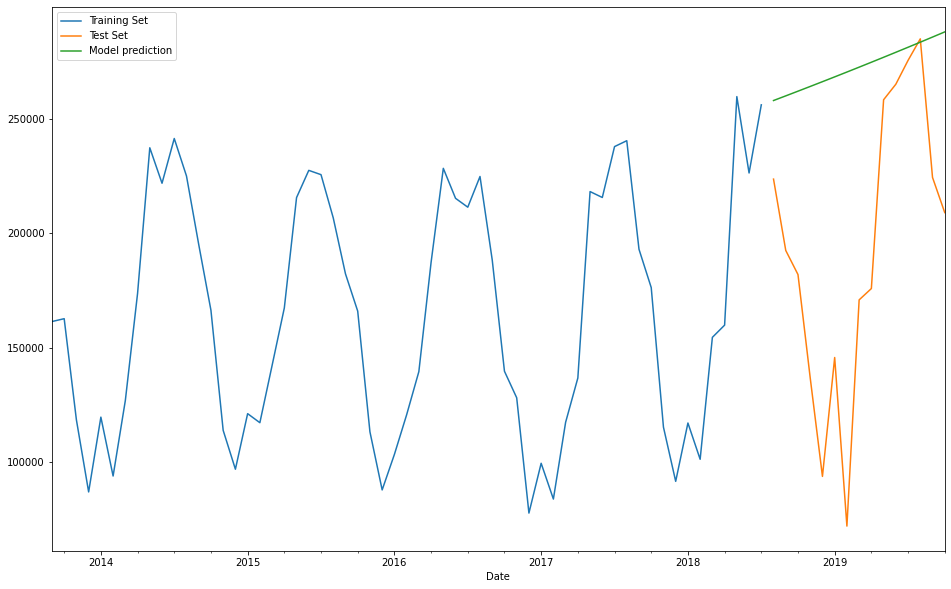

In [81]:
# Let us use the double exponential smoothing model
model = ExponentialSmoothing(train_set['Total'],trend='mul').fit()
predictions = model.forecast(15)
train_set['Total'].plot(legend=True,label='Training Set')
test_set['Total'].plot(legend=True,label='Test Set',figsize=(16,10))
predictions.plot(legend=True,label='Model prediction');

## 8. ARIMA

In [82]:
from pmdarima import auto_arima

In [83]:
# Train-test split
train_samples = int(new_df.shape[0] * 0.8)

train_set = new_df.iloc[:train_samples]
test_set = new_df.iloc[train_samples:]

print("Training set: ", train_set.shape[0])
print("Test set: ", test_set.shape[0])

Training set:  59
Test set:  15


In [84]:
train_set.dropna(inplace=True)

##### Use Auto ARIMA to find out order

In [85]:
model = auto_arima(train_set['Total'],seasonal=False)

In [86]:
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']
print('Order = ', order)
print('Seasonal Order = ', seasonal_order)

Order =  (5, 0, 1)
Seasonal Order =  (0, 0, 0, 0)


In [87]:
# Create and fit model
from statsmodels.tsa.arima_model import ARMA, ARIMA

model_ARIMA = ARIMA(train_set['Total'], order = order)
model_ARIMA = model_ARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12443D+01    |proj g|=  3.44448D-02

At iterate    5    f=  1.12352D+01    |proj g|=  4.05485D-02

At iterate   10    f=  1.12310D+01    |proj g|=  1.66805D-02

At iterate   15    f=  1.12241D+01    |proj g|=  3.07416D-02

At iterate   20    f=  1.12234D+01    |proj g|=  9.21663D-03

At iterate   25    f=  1.12234D+01    |proj g|=  5.98632D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     33      1     0     0   

In [88]:
# Predict with ARIMA
start=len(train_set)
end=len(train_set)+len(test_set)-1
ARIMApredictions = model_ARIMA.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA Predictions')
# model_ARIMA.summary()

In [89]:
# Calculate Evaluation Metrics
y_test = test_set['Total']
y_pred = ARIMApredictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2018-08-31,223618.0,214044.633459,9573.366541
2018-09-30,192484.0,192863.477464,-379.477464
2018-10-31,181964.0,131433.182998,50530.817002
2018-11-30,136862.0,110365.029598,26496.970402
2018-12-31,93882.0,80637.087156,13244.912844
2019-01-31,145766.0,88814.003343,56951.996657
2019-02-28,72198.0,105459.706374,-33261.706374
2019-03-31,170914.0,147989.099718,22924.900282
2019-04-30,175864.0,185252.158405,-9388.158405
2019-05-31,258246.0,223583.589519,34662.410481


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  1453458144.5447211
RMSE =  38124.24615051058
MAE =  32535.16402018895


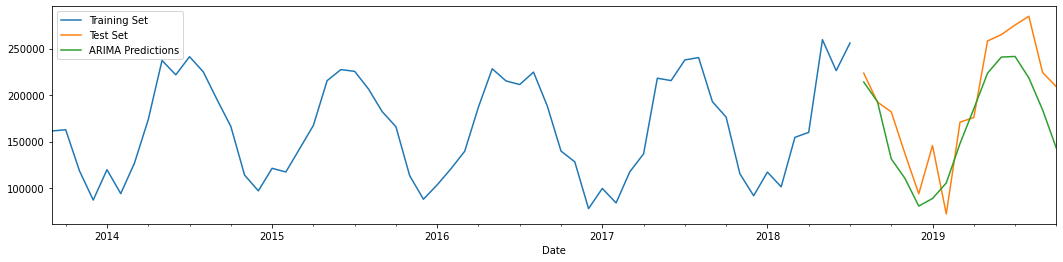

In [91]:
# Plot results
train_set['Total'].rename('Training Set').plot(legend=True)
test_set['Total'].rename('Test Set').plot(legend=True)
ARIMApredictions.plot(legend=True)
plt.show()

***
## 9. Seasonal ARIMA - SARIMA

In [92]:
model = auto_arima(train_set['Total'],seasonal=True,m=12)

In [93]:
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

print('Order = ', order)
print('Seasonal Order = ', seasonal_order)

Order =  (1, 0, 0)
Seasonal Order =  (0, 1, 1, 12)


In [94]:
# Create and fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA = SARIMAX(train_set['Total'], order=order, seasonal_order=seasonal_order)
model_SARIMA = model_SARIMA.fit()
model_SARIMA.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97961D+00    |proj g|=  9.66152D-01

At iterate    5    f=  8.90413D+00    |proj g|=  5.16077D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   1.652D-06   8.904D+00
  F =   8.9041304244351664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ar.L1       2.486519e-01
ma.S.L12   -6.665610e-02
sigma2      3.104276e+08
dtype: float64

In [95]:
# Create SARIMA predictions
start=len(train_set)
end=len(train_set)+len(test_set)-1
SARIMApredictions = model_SARIMA.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

In [96]:
# Calculate Evaluation Metrics
y_test = test_set['Total']
y_pred = SARIMApredictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2018-08-31,223618.0,244210.834172,-20592.834172
2018-09-30,192484.0,193892.108014,-1408.108014
2018-10-31,181964.0,174274.484433,7689.515567
2018-11-30,136862.0,116233.218743,20628.781257
2018-12-31,93882.0,90867.038233,3014.961767
2019-01-31,145766.0,116037.644512,29728.355488
2019-02-28,72198.0,100360.278105,-28162.278105
2019-03-31,170914.0,152195.661748,18718.338252
2019-04-30,175864.0,158574.618229,17289.381771
2019-05-31,258246.0,256904.645782,1341.354218


In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  603286126.2346947
RMSE =  24561.883605185794
MAE =  20997.76262594391


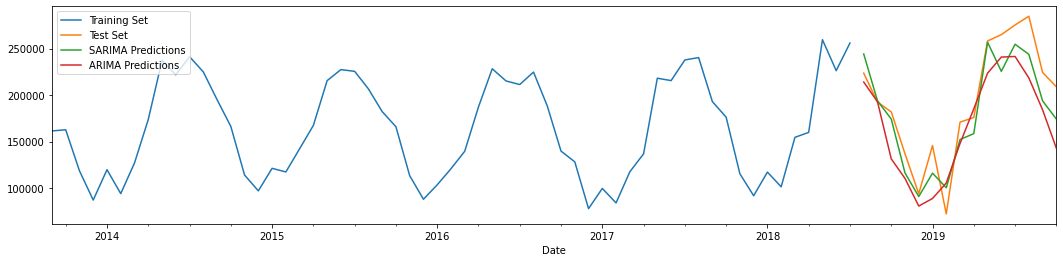

In [98]:
# Plot results
train_set['Total'].rename('Training Set').plot(legend=True)
test_set['Total'].rename('Test Set').plot(legend=True)
SARIMApredictions.plot(legend = True)
ARIMApredictions.plot(legend=True)
plt.show()

In [99]:
# Evaluate models - calculate MAE, RMSE
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print('SARIMA:')
print('  RMSE = ' ,mse(SARIMApredictions, test_set['Total'], squared = False))
print('  MAE = ', mae(SARIMApredictions, test_set['Total']))
print('\nARIMA:')
print('  RMSE = ' ,mse(ARIMApredictions, test_set['Total'], squared = False))
print('  MAE = ', mae(ARIMApredictions, test_set['Total']))
print('\n')
print('  Mean of the data = ', new_df.Total.mean())
print('  St Dev of the data = ', new_df.Total.std())

SARIMA:
  RMSE =  24561.883605185794
  MAE =  20997.76262594391

ARIMA:
  RMSE =  38124.24615051058
  MAE =  32535.16402018895


  Mean of the data =  170160.72972972973
  St Dev of the data =  56406.95808878602


***
## 10. Deep Learning - Timeseries prediction using RNNs

In [100]:
train_set.index

DatetimeIndex(['2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
      

In [101]:
train_set = train_set[['Total']]
test_set = test_set[['Total']]

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
std_scaler = StandardScaler()

In [104]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
std_scaler.fit(train_set)

StandardScaler()

In [105]:
std_train = std_scaler.transform(train_set)
std_test = std_scaler.transform(test_set)

In [106]:
from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
lag = 12
batch_size = 1
sequences = TimeseriesGenerator(std_train, std_train, length=lag, batch_size=batch_size)

2021-11-19 22:44:26.115782: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2021-11-19 22:44:26.115812: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [107]:
std_train

array([[-0.04997153],
       [-0.02633945],
       [-0.86396963],
       [-1.46015809],
       [-0.8410962 ],
       [-1.32845571],
       [-0.70374185],
       [ 0.18240428],
       [ 1.38824731],
       [ 1.0947619 ],
       [ 1.46506105],
       [ 1.15480939],
       [ 0.58839811],
       [ 0.04315328],
       [-0.95045622],
       [-1.27223943],
       [-0.81238114],
       [-0.88714652],
       [-0.41355659],
       [ 0.06261277],
       [ 0.97595665],
       [ 1.20135283],
       [ 1.16580988],
       [ 0.80814232],
       [ 0.34494595],
       [ 0.03628746],
       [-0.96267055],
       [-1.44350563],
       [-1.14986849],
       [-0.82182639],
       [-0.46438642],
       [ 0.4397398 ],
       [ 1.21811909],
       [ 0.96996328],
       [ 0.89660141],
       [ 1.15063679],
       [ 0.45938895],
       [-0.46138974],
       [-0.68086842],
       [-1.6352555 ],
       [-1.22300277],
       [-1.51902966],
       [-0.88380844],
       [-0.51715083],
       [ 1.02580023],
       [ 0

In [108]:
len(std_train)

59

In [109]:
len(sequences) # n_input = 2

47

In [110]:
# What does the first batch look like?
X,y = sequences[0]

In [111]:
X

array([[[-0.04997153],
        [-0.02633945],
        [-0.86396963],
        [-1.46015809],
        [-0.8410962 ],
        [-1.32845571],
        [-0.70374185],
        [ 0.18240428],
        [ 1.38824731],
        [ 1.0947619 ],
        [ 1.46506105],
        [ 1.15480939]]])

In [112]:
y

array([[0.58839811]])

### Create the Model

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

In [114]:
# define model
model = Sequential()
model.add(LSTM(100, input_shape=(lag, batch_size)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2021-11-19 22:44:30.416342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2021-11-19 22:44:30.416374: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-19 22:44:30.416405: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-mp6096): /proc/driver/nvidia/version does not exist
2021-11-19 22:44:30.416702: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [116]:
# fit model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = model.fit_generator(sequences,epochs=50, callbacks=[callback])

Epoch 1/50
47/47 [==============================] - 2s 6ms/step - loss: 0.7002
Epoch 2/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1889
Epoch 3/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1644
Epoch 4/50
47/47 [==============================] - 0s 6ms/step - loss: 0.2085
Epoch 5/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1344
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1659
Epoch 7/50
47/47 [==============================] - 0s 7ms/step - loss: 0.1517
Epoch 8/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1545
Epoch 9/50
47/47 [==============================] - 0s 6ms/step - loss: 0.1663


In [117]:
model.history.history.keys()

dict_keys(['loss'])

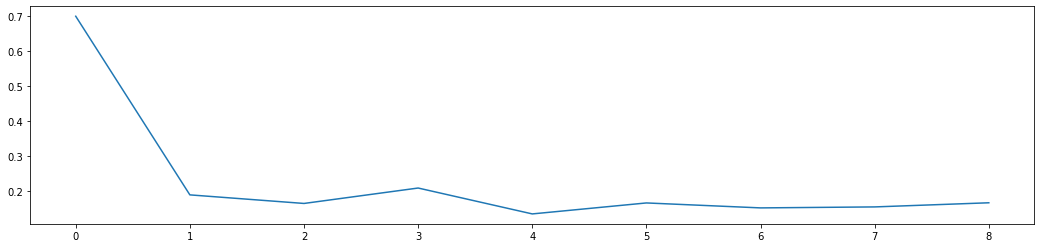

In [118]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test Data

In [119]:
predictors = std_train[-lag:]

In [120]:
predictors

array([[ 1.44681542],
       [ 0.54818943],
       [ 0.23126161],
       [-0.92413091],
       [-1.37257146],
       [-0.88972594],
       [-1.18992544],
       [-0.18064973],
       [-0.07963491],
       [ 1.81191779],
       [ 1.17965532],
       [ 1.74382857]])

In [121]:
predictors = predictors.reshape((1, lag, 1))

In [122]:
x = model.predict(predictors)
x

array([[1.0183713]], dtype=float32)

In [123]:
std_scaler.inverse_transform(x)

array([[217786.31]], dtype=float32)

In [124]:
test_set.iloc[1]

Total    192484.0
Name: 2018-09-30 00:00:00, dtype: float64

In [125]:
print(std_test[0])
print(test_set.iloc[1])

[1.12897721]
Total    192484.0
Name: 2018-09-30 00:00:00, dtype: float64


In [126]:
predictors = std_train[-lag:].reshape((1, lag, 1))
predictions = []
for i in range(len(std_test)):
    next_pred = model.predict(predictors)[0]
    predictions.append(next_pred) 
    predictors = np.append(predictors[:,1:,:],[[next_pred]],axis=1)

predictions

[array([1.0183713], dtype=float32),
 array([0.3387398], dtype=float32),
 array([-0.3683249], dtype=float32),
 array([-1.0099677], dtype=float32),
 array([-1.3806775], dtype=float32),
 array([-1.4130346], dtype=float32),
 array([-1.1380554], dtype=float32),
 array([-0.5403607], dtype=float32),
 array([0.15763152], dtype=float32),
 array([0.8923445], dtype=float32),
 array([1.3165114], dtype=float32),
 array([1.4456229], dtype=float32),
 array([1.1038039], dtype=float32),
 array([0.52420604], dtype=float32),
 array([-0.1375544], dtype=float32)]

In [127]:
final_predictions = std_scaler.inverse_transform(predictions)
final_predictions

array([[217786.31],
       [181952.78],
       [144672.84],
       [110842.26],
       [ 91296.61],
       [ 89590.58],
       [104088.84],
       [135602.27],
       [172403.86],
       [211141.55],
       [233505.73],
       [240313.12],
       [222290.73],
       [191731.47],
       [156840.2 ]], dtype=float32)

<AxesSubplot:xlabel='Date'>

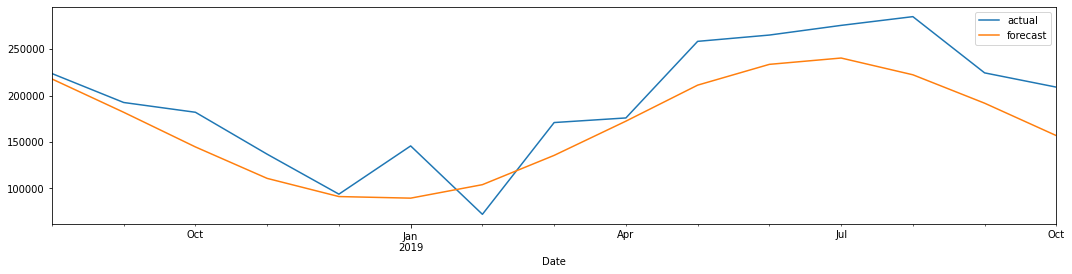

In [128]:
pd.DataFrame({'actual': test_set.Total, 'forecast': final_predictions.flatten()}).plot()

In [129]:
y_test = test_set.Total
y_pred = final_predictions.flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  1319407444.9682333
RMSE =  36323.64856354925
MAE =  31342.968229166665


### 11. SARIMAX

In [130]:
# Data adapted from: 
# https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries
df_elec = pd.read_csv('pwr_usage.csv')
df_elec

,Date,Temp_avg,kwh
0,1/8/2017,75.542857,106.549
1,1/15/2017,71.014286,129.096
2,1/22/2017,64.414286,68.770
3,1/29/2017,56.728571,71.378
4,2/5/2017,66.128571,107.829
...,...,...,...
152,12/8/2019,74.371429,167.481
153,12/15/2019,61.242857,86.248
154,12/22/2019,50.000000,73.206
155,12/29/2019,60.128571,35.655


### First, explore the data

In [131]:
df_elec.index = pd.DatetimeIndex(df_elec.Date, freq='W-SUN')
df_elec.drop(['Date'], axis = 1, inplace = True)
df_elec

,Temp_avg,kwh
Date,,
2017-01-08,75.542857,106.549
2017-01-15,71.014286,129.096
2017-01-22,64.414286,68.770
2017-01-29,56.728571,71.378
2017-02-05,66.128571,107.829
...,...,...
2019-12-08,74.371429,167.481
2019-12-15,61.242857,86.248
2019-12-22,50.000000,73.206


In [132]:
df_elec.index

DatetimeIndex(['2017-01-08', '2017-01-15', '2017-01-22', '2017-01-29',
               '2017-02-05', '2017-02-12', '2017-02-19', '2017-02-26',
               '2017-03-05', '2017-03-12',
               ...
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22',
               '2019-12-29', '2020-01-05'],
              dtype='datetime64[ns]', name='Date', length=157, freq='W-SUN')

<AxesSubplot:xlabel='Date'>

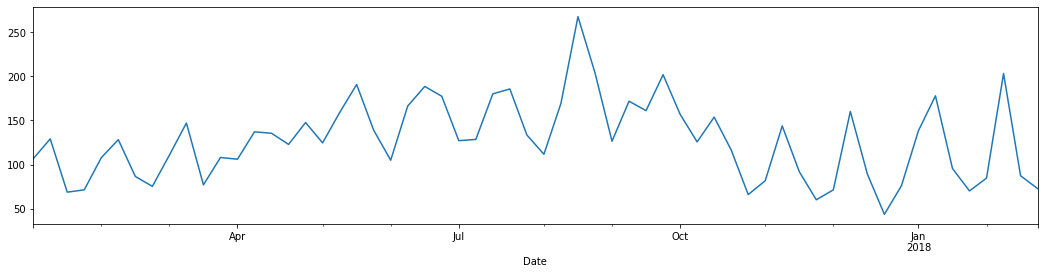

In [133]:
df_elec['kwh'][:60].plot()

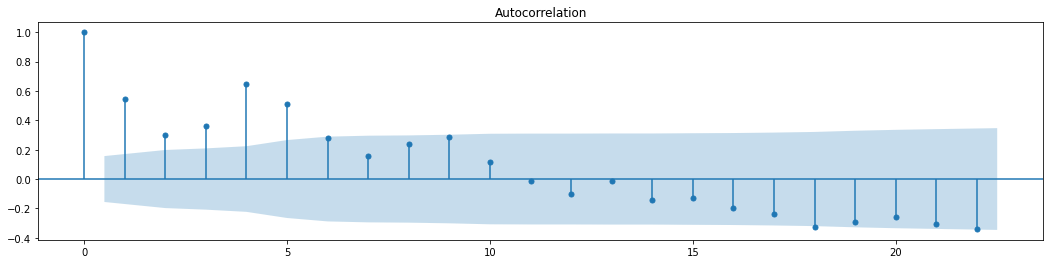

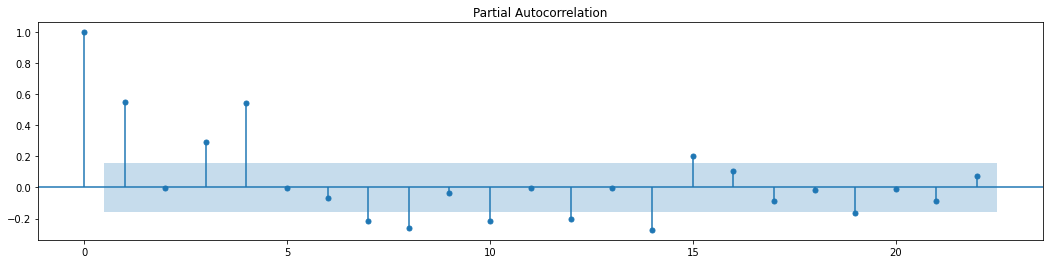

In [134]:
plt.rc("figure", figsize=(18,4))
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_elec['kwh']);
plot_pacf(df_elec['kwh']);

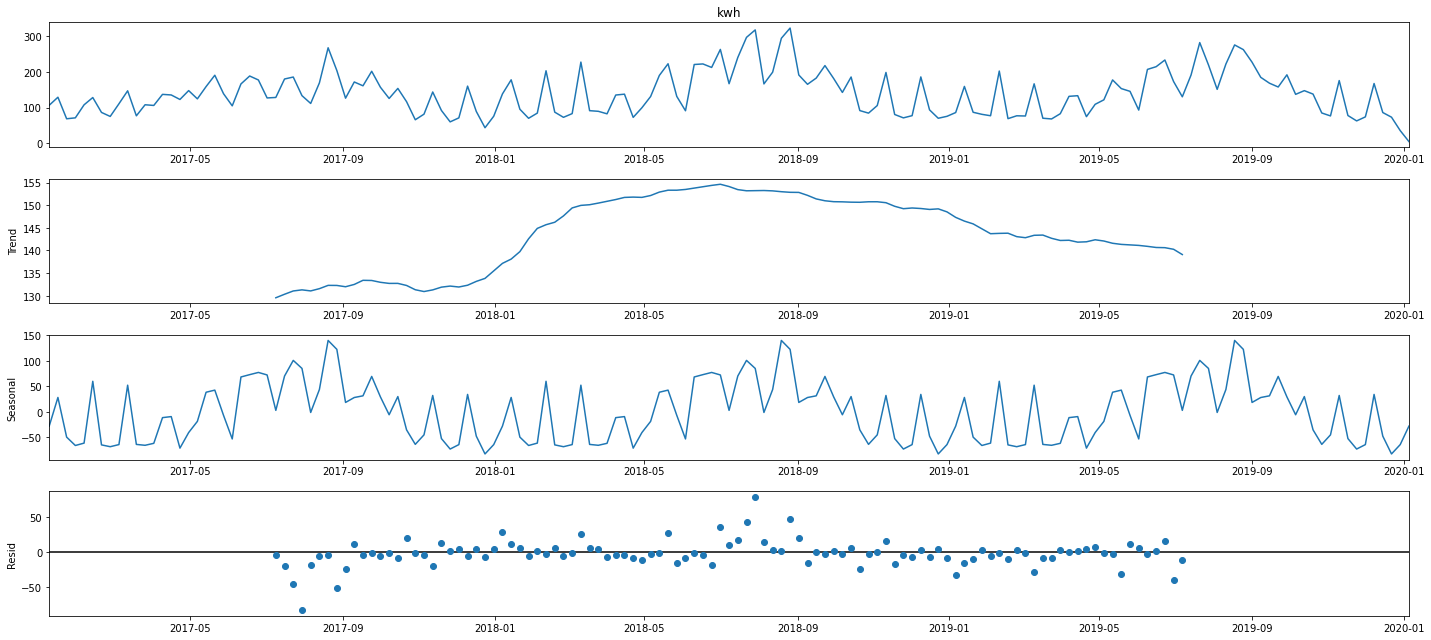

In [135]:
result = seasonal_decompose(df_elec['kwh'], model = 'additive') 
plt.rcParams['figure.figsize'] = (20, 9)
result.plot();

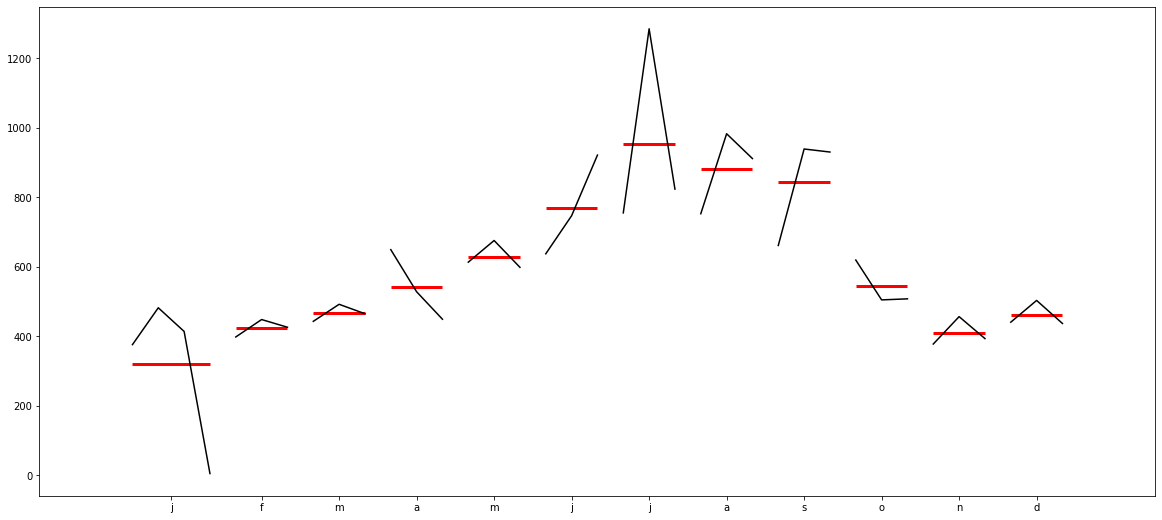

In [136]:
# Plot the months to see trends over months
month_plot(df_elec[['kwh']].resample(rule='M').kwh.sum());

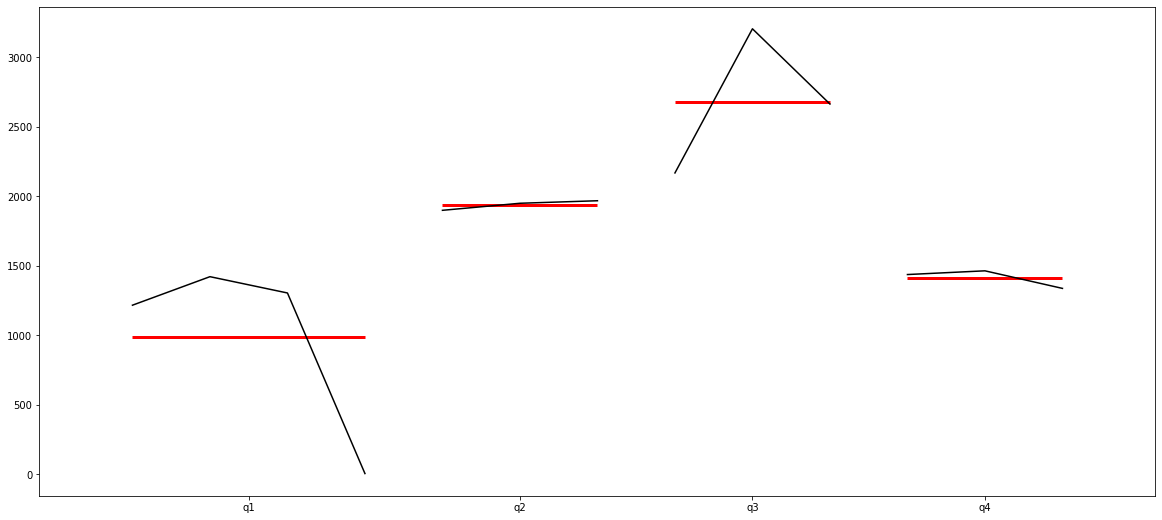

In [137]:
# Plot the quarter to see trends over quarters
quarter_plot(df_elec[['kwh']].resample(rule='Q').kwh.sum());

### Train-test split

In [138]:
# Train-test split
test_samples = 12

train_set = df_elec.iloc[:-test_samples]
test_set = df_elec.iloc[-test_samples:]

print("Training set: ", train_set.shape[0])
print("Test set: ", test_set.shape[0])

Training set:  145
Test set:  12


In [139]:
train_set

,Temp_avg,kwh
Date,,
2017-01-08,75.542857,106.5490
2017-01-15,71.014286,129.0960
2017-01-22,64.414286,68.7700
2017-01-29,56.728571,71.3780
2017-02-05,66.128571,107.8290
...,...,...
2019-09-15,76.800000,168.3470
2019-09-22,79.385714,157.7260
2019-09-29,80.928571,191.8260


In [140]:
test_set

,Temp_avg,kwh
Date,,
2019-10-20,73.471429,137.847
2019-10-27,64.557143,84.999
2019-11-03,62.928571,76.744
2019-11-10,77.985714,175.708
2019-11-17,49.042857,77.927
2019-11-24,62.785714,62.805
2019-12-01,69.557143,74.079
2019-12-08,74.371429,167.481
2019-12-15,61.242857,86.248


###### Uncomment this cell to run auto-ARIMA (very time consuming)
###### Determine parameters for SARIMAX using Auto-ARIMA  
```Python
model = auto_arima(train_set['kwh'],seasonal=True,m=52)  
order = model.get_params()['order']  
seasonal_order = model.get_params()['seasonal_order']  
  
print('Order = ', order)  
print('Seasonal Order = ', seasonal_order)  
```

In [141]:
order =  (1, 0, 1)
seasonal_order =  (1, 0, 1, 52)

### First, let us try SARIMA, ignoring temperature

In [142]:
# Create and fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA = SARIMAX(train_set['kwh'],order=order,seasonal_order=seasonal_order)
model_SARIMA = model_SARIMA.fit()
# model_SARIMA.summary()
model_SARIMA.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40784D+00    |proj g|=  4.84623D-01


 This problem is unconstrained.



At iterate    5    f=  5.23343D+00    |proj g|=  4.05311D-02

At iterate   10    f=  5.21673D+00    |proj g|=  1.53782D-02

At iterate   15    f=  5.08234D+00    |proj g|=  2.89007D-02

At iterate   20    f=  5.08002D+00    |proj g|=  5.29671D-03

At iterate   25    f=  5.07119D+00    |proj g|=  3.02235D-02

At iterate   30    f=  5.06971D+00    |proj g|=  5.39823D-04

At iterate   35    f=  5.06950D+00    |proj g|=  6.58764D-03

At iterate   40    f=  5.06933D+00    |proj g|=  3.18838D-03

At iterate   45    f=  5.06928D+00    |proj g|=  1.85634D-03

At iterate   50    f=  5.06926D+00    |proj g|=  1.82174D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

ar.L1         0.983458
ma.L1        -0.702533
ar.S.L52      0.994759
ma.S.L52     -0.842519
sigma2      783.942123
dtype: float64

In [143]:
# Create SARIMA predictions
start=len(train_set)
end=len(train_set)+len(test_set)-1
SARIMApredictions = model_SARIMA.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

In [144]:
# Calculate Evaluation Metrics
y_test = test_set['kwh']
y_pred = SARIMApredictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2019-10-20,137.847,108.382159,29.464841
2019-10-27,84.999,83.961906,1.037094
2019-11-03,76.744,99.183527,-22.439527
2019-11-10,175.708,164.316831,11.391169
2019-11-17,77.927,92.007229,-14.080229
2019-11-24,62.805,74.358095,-11.553095
2019-12-01,74.079,81.304869,-7.225869
2019-12-08,167.481,164.304710,3.176290
2019-12-15,86.248,95.020821,-8.772821
2019-12-22,73.206,65.677082,7.528918


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  1320.1512007697531
RMSE =  36.33388502169501
MAE =  22.538810600669688


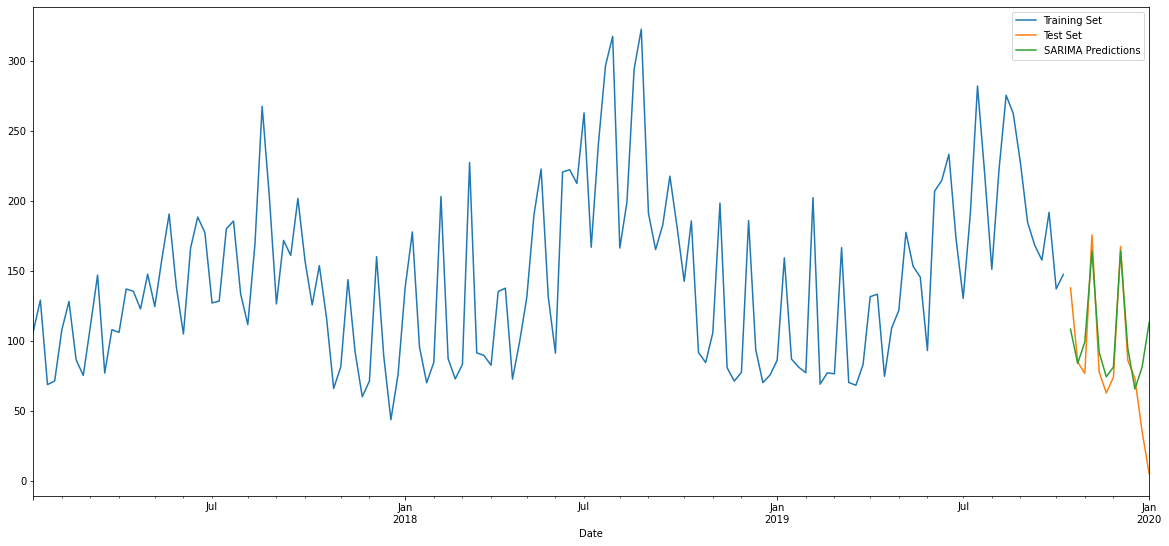

In [146]:
# Plot results
train_set['kwh'].rename('Training Set').plot(legend=True)
test_set['kwh'].rename('Test Set').plot(legend=True)
SARIMApredictions.plot(legend = True)
plt.show()

In [147]:
y_test

Date
2019-10-20    137.847
2019-10-27     84.999
2019-11-03     76.744
2019-11-10    175.708
2019-11-17     77.927
2019-11-24     62.805
2019-12-01     74.079
2019-12-08    167.481
2019-12-15     86.248
2019-12-22     73.206
2019-12-29     35.655
2020-01-05      4.947
Freq: W-SUN, Name: kwh, dtype: float64


### Let us use SARIMAX - Seasonal ARIMA with eXogenous Variable

In [148]:
model = SARIMAX(endog=train_set['kwh'],exog=train_set['Temp_avg'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09135D+00    |proj g|=  2.84844D-01

At iterate    5    f=  5.05004D+00    |proj g|=  1.82806D-03

At iterate   10    f=  5.04982D+00    |proj g|=  3.97871D-03

At iterate   15    f=  5.04948D+00    |proj g|=  2.01126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   1.329D-05   5.049D+00
  F =   5.0494764926288518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               kwh   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood                -732.174
Date:                           Fri, 19 Nov 2021   AIC                           1474.348
Time:                                   22:44:49   BIC                           1489.232
Sample:                               01-08-2017   HQIC                          1480.396
                                    - 10-13-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp_avg       2.1916      0.096     22.781      0.000       2.003       2.380
ar.L1          0.6524      0.064     10.202      0.000       0.527       0.778
ar.S.L7       -0.2007      0.089     -2.261      0.024      -0.375      -0.027
ar.S.L14      -0.0945      0.090     -1.048      0.294      -0.271       0.082
sigma2      1414.9974    193.794      7.302      0.000    1035.169    1794.826
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.65   Prob(JB):                         0.30
Heteroskedasticity (H):               1.42   Skew:                             0.30
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
# Create and fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX = SARIMAX(train_set['kwh'], exog = train_set['Temp_avg'], order=order,seasonal_order=seasonal_order)
model_SARIMAX = model_SARIMAX.fit()
# model_SARIMA.summary()
model_SARIMAX.params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06742D+00    |proj g|=  4.21761D-01


 This problem is unconstrained.



At iterate    5    f=  4.96294D+00    |proj g|=  3.33382D-02

At iterate   10    f=  4.95372D+00    |proj g|=  8.01960D-03

At iterate   15    f=  4.90784D+00    |proj g|=  1.06476D-01

At iterate   20    f=  4.88309D+00    |proj g|=  1.10884D-02

At iterate   25    f=  4.84105D+00    |proj g|=  1.10072D-02

At iterate   30    f=  4.83455D+00    |proj g|=  2.06627D-03

At iterate   35    f=  4.83408D+00    |proj g|=  3.48925D-03

At iterate   40    f=  4.83372D+00    |proj g|=  1.70944D-03

At iterate   45    f=  4.83357D+00    |proj g|=  2.44578D-03

At iterate   50    f=  4.83350D+00    |proj g|=  9.06727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

Temp_avg      4.493908
ar.L1         0.994560
ma.L1        -0.671078
ar.S.L52      0.995803
ma.S.L52     -0.932787
sigma2      680.778466
dtype: float64

In [150]:
# Create SARIMAX predictions
exog = test_set[['Temp_avg']]
start=len(train_set)
end=len(train_set)+len(test_set)-1
SARIMAXpredictions = model_SARIMAX.predict(start=start, end=end, exog = exog, dynamic=False, typ='levels').rename('SARIMAX Predictions')

In [151]:
# Calculate Evaluation Metrics
y_test = test_set['kwh']
y_pred = SARIMAXpredictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2019-10-20,137.847,135.664921,2.182079
2019-10-27,84.999,90.787244,-5.788244
2019-11-03,76.744,81.487914,-4.743914
2019-11-10,175.708,172.783741,2.924259
2019-11-17,77.927,35.770526,42.156474
2019-11-24,62.805,89.060196,-26.255196
2019-12-01,74.079,120.612477,-46.533477
2019-12-08,167.481,150.245855,17.235145
2019-12-15,86.248,100.088261,-13.840261
2019-12-22,73.206,22.090414,51.115586


In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  3131.5210005040244
RMSE =  55.959994643531054
MAE =  36.230284843950024


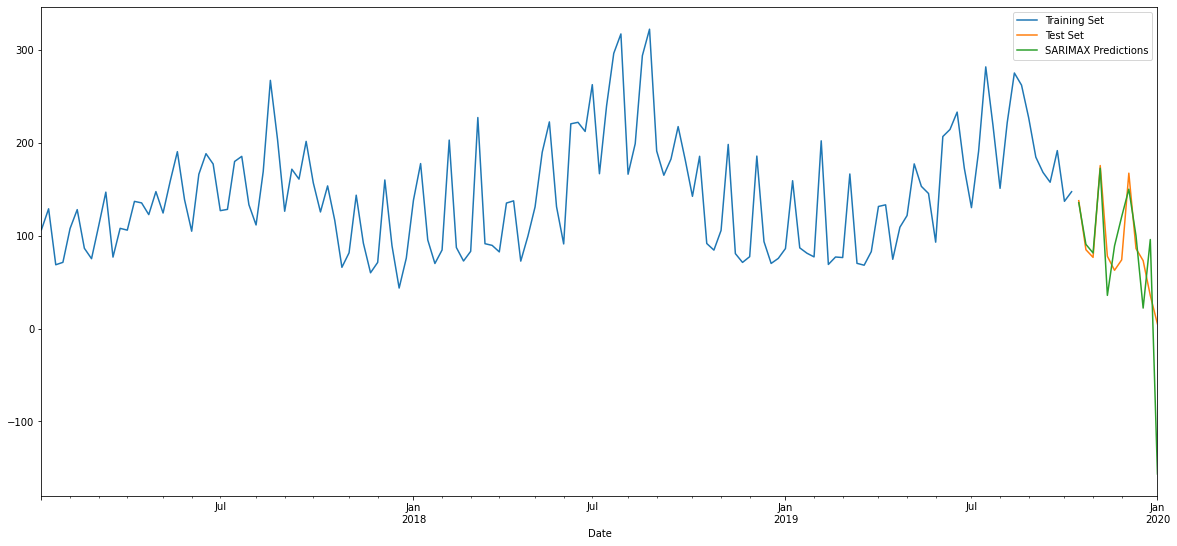

In [153]:
# Plot results
train_set['kwh'].rename('Training Set').plot(legend=True)
test_set['kwh'].rename('Test Set').plot(legend=True)
SARIMAXpredictions.plot(legend = True)
plt.show()

In [154]:
y_test

Date
2019-10-20    137.847
2019-10-27     84.999
2019-11-03     76.744
2019-11-10    175.708
2019-11-17     77.927
2019-11-24     62.805
2019-12-01     74.079
2019-12-08    167.481
2019-12-15     86.248
2019-12-22     73.206
2019-12-29     35.655
2020-01-05      4.947
Freq: W-SUN, Name: kwh, dtype: float64

***
## Experiment - Can we predict the S&P500

In [155]:
# Let us get some data.  We download the daily time series for the S&P500 for 30 months
import yfinance as yf
SPY = yf.download('SPY', start = '2013-01-01', end = '2015-06-30')

[*********************100%***********************]  1 of 1 completed


In [156]:
# Clean up
SPY.index = pd.DatetimeIndex(SPY.index) # Set index
SPY = SPY.asfreq('B') # This creates rows for any missing dates
SPY.fillna(method = 'bfill', inplace=True) # Fills missing dates with last observation

In [157]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 2013-01-02 to 2015-06-29
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       649 non-null    float64
 1   High       649 non-null    float64
 2   Low        649 non-null    float64
 3   Close      649 non-null    float64
 4   Adj Close  649 non-null    float64
 5   Volume     649 non-null    float64
dtypes: float64(6)
memory usage: 35.5 KB


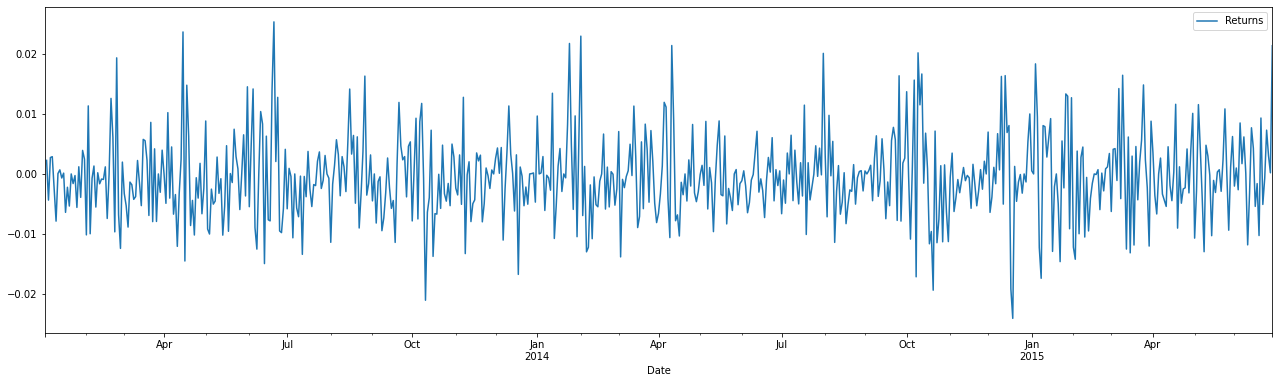

In [158]:
SPY['Returns'] = (SPY['Close'].shift(1) / SPY['Close']) - 1
SPY[['Returns']].plot(figsize = (22,6));


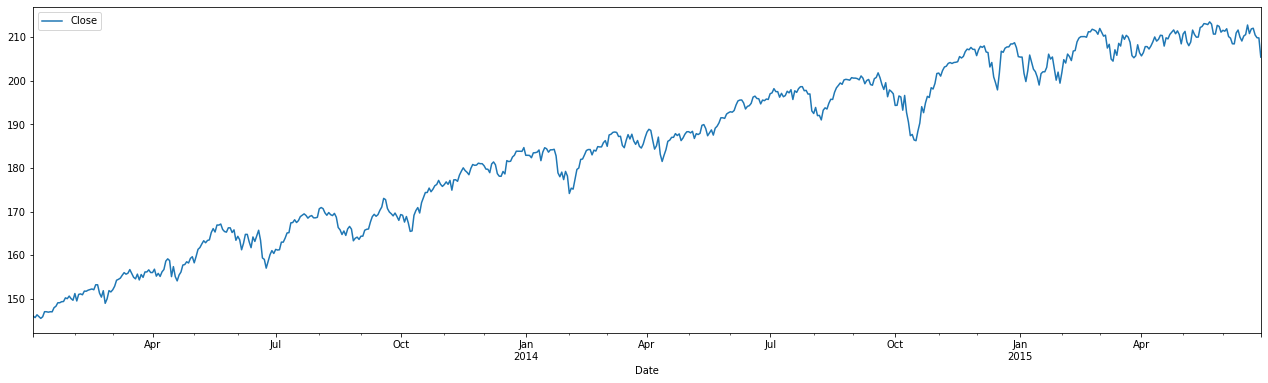

In [159]:
SPY[['Close']].plot(figsize = (22,6));

In [160]:
# Train-test split
train_samples = int(SPY.shape[0] * 0.8)

train_set = SPY.iloc[:train_samples]
test_set = SPY.iloc[train_samples:]

print("Training set: ", train_set.shape[0])
print("Test set: ", test_set.shape[0])

Training set:  519
Test set:  130


In [161]:
model = auto_arima(train_set['Close'], seasonal=True , m = 12)

In [162]:
order = model.get_params()['order']
seasonal_order = model.get_params()['seasonal_order']

print('Order = ', order)
print('Seasonal Order = ', seasonal_order)

Order =  (0, 1, 0)
Seasonal Order =  (0, 0, 0, 12)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62064D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.621D+00
  F =   1.6206385258951643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


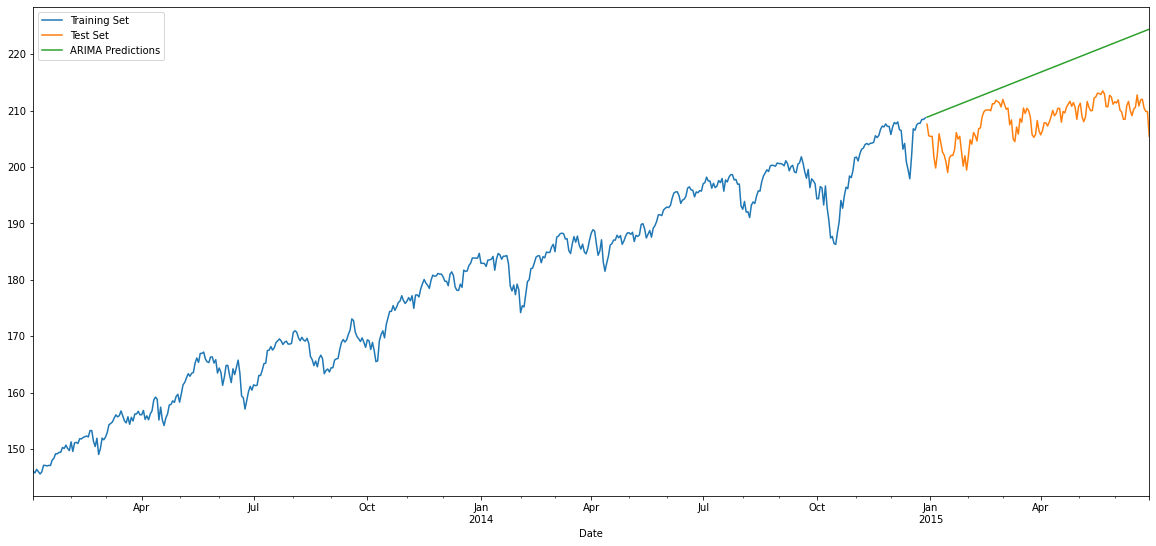

In [163]:
model = ARIMA(train_set['Close'],order = order)
results = model.fit()
results.summary()

start=len(train_set)
end=len(train_set)+len(test_set)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA Predictions')

train_set['Close'].rename('Training Set').plot(legend=True)
test_set['Close'].rename('Test Set').plot(legend=True)
predictions.plot(legend = True)
plt.show()

In [164]:
# Calculate Evaluation Metrics
y_test = test_set['Close']
y_pred = predictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2014-12-30,207.600006,208.840966,-1.240960
2014-12-31,205.539993,208.961932,-3.421938
2015-01-01,205.429993,209.082897,-3.652904
2015-01-02,205.429993,209.203862,-3.773870
2015-01-05,201.720001,209.324828,-7.604826
...,...,...,...
2015-06-23,212.039993,223.961624,-11.921630
2015-06-24,210.500000,224.082589,-13.582589
2015-06-25,209.860001,224.203554,-14.343554
2015-06-26,209.820007,224.324520,-14.504512


In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  80.31134532452799
RMSE =  8.961659741617508
MAE =  8.350302178859721


In [166]:
plt.rcParams['figure.figsize'] = (20, 9)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62237D+00    |proj g|=  1.56207D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   2.011D-06   1.622D+00
  F =   1.6223704167796551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


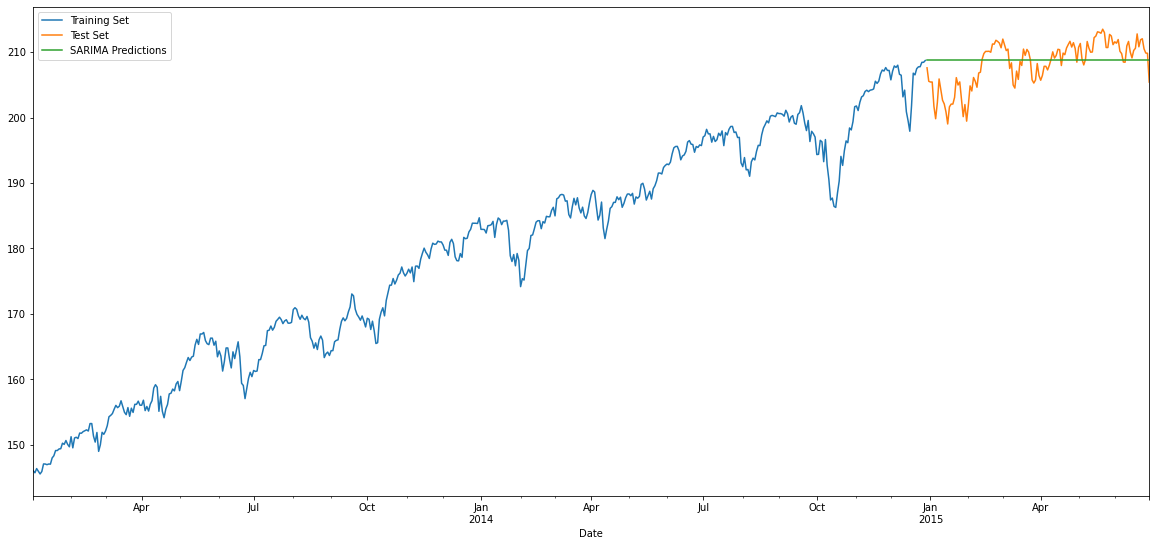

In [167]:
# Create and fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_set['Close'],order=order,seasonal_order=seasonal_order)
results = model.fit()


start=len(train_set)
end=len(train_set)+len(test_set)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

train_set['Close'].rename('Training Set').plot(legend=True)
test_set['Close'].rename('Test Set').plot(legend=True)
predictions.plot(legend = True)
plt.show()

In [168]:
# Calculate Evaluation Metrics
y_test = test_set['Close']
y_pred = predictions
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2014-12-30,207.600006,208.720001,-1.119995
2014-12-31,205.539993,208.720001,-3.180008
2015-01-01,205.429993,208.720001,-3.290009
2015-01-02,205.429993,208.720001,-3.290009
2015-01-05,201.720001,208.720001,-7.000000
...,...,...,...
2015-06-23,212.039993,208.720001,3.319992
2015-06-24,210.500000,208.720001,1.779999
2015-06-25,209.860001,208.720001,1.139999
2015-06-26,209.820007,208.720001,1.100006


In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  11.971797943699102
RMSE =  3.460028604462556
MAE =  2.769538996769832
